   Epochs  Dataset Size (KB)  Definition Size (KB)  Input Model Size (KB)  \
0       1        11688.74707               0.12207             1264.72168   
1       3        11688.74707               0.12207             1264.72168   
2       5        11688.74707               0.12207             1264.72168   
3      10        11688.74707               0.12207             1264.72168   
4      20        11688.74707               0.12207             1264.72168   
5      50        11688.74707               0.12207             1264.72168   

   Trained Model Size (KB)  AIBOM Size (KB)  Logs Size (KB)  \
0              3730.624023        13.507812        4.251953   
1              3730.624023        13.664062        4.251953   
2              3730.624023        13.822266        4.251953   
3              3730.624023        14.197266        4.251953   
4              3730.624023        14.969727        4.251953   
5              3730.624023        17.330078        4.251953   

   Metrics Size (K

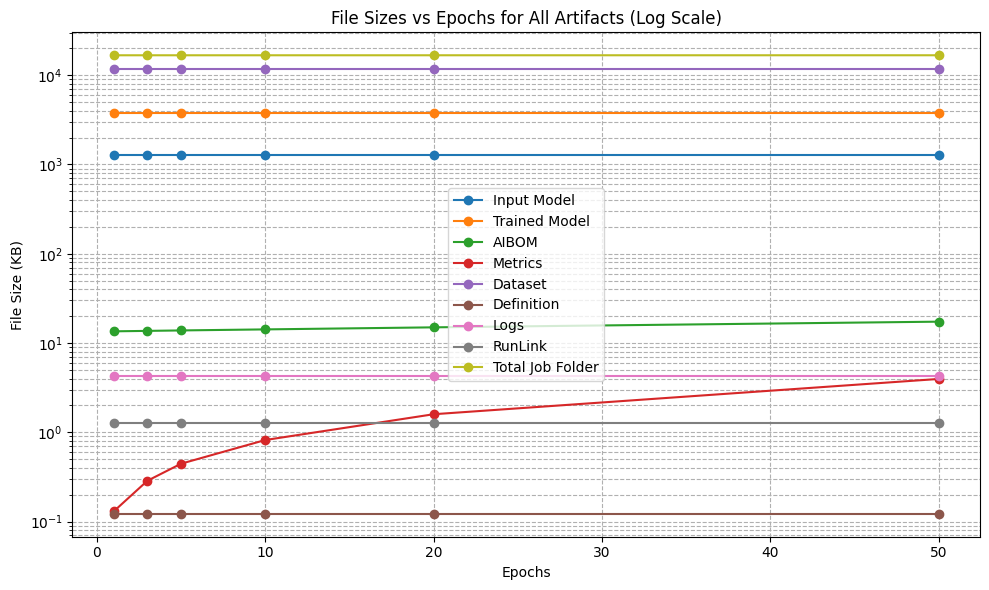

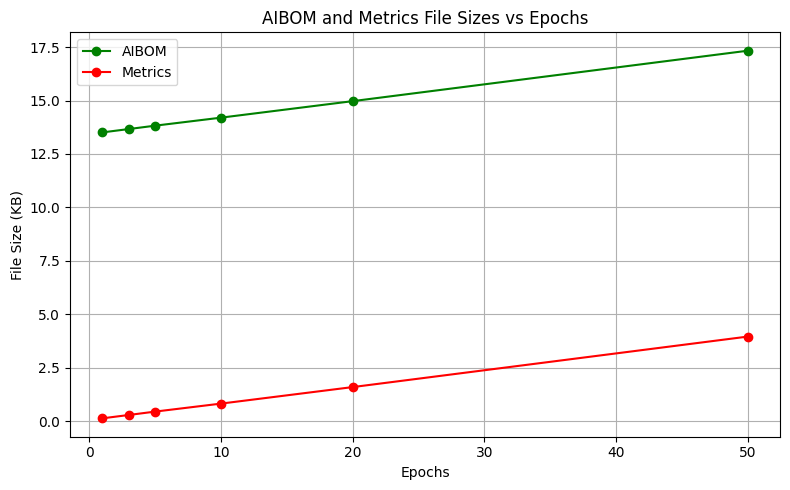

In [6]:
# to make this script executable, after running performance.py, make sure you download the folders from minio (dashboard is easiest)
# and that they are in your download folder (~/Downloads/). Then update folder paths and run this.

import os
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

DOWNLOADS = Path.home() / "Downloads"
# Example: fill in your actual file paths for each run (in order!)
epochs_list = [1, 3, 5, 10, 20, 50]
minio_job_folders = [
    "00c383d1-b478-49d6-bc4e-c3458ba1122d",
    "37508286-5c53-4537-8212-8c21b9cbc768",
    "d67ee302-7315-4b7e-9747-f8abd1ec48a7",
    "e65b44b3-d83c-46dd-989e-cdfa823b1eb5",
    "df490a48-9cec-4fdd-8ff8-da420014c8d4",
    "5455cdb8-ccb4-4ec8-9a01-7a902dfcf5f4",
]
model_sizes = []
trained_model_sizes = []
aibom_sizes = []
dataset_sizes = []
definition_sizes = []
logs_sizes = []
metrics_sizes = []
runlink_sizes = []
total_folder_sizes = []

for folder in minio_job_folders:
    folder_path = DOWNLOADS / folder
    # Top-level files
    dataset_file = folder_path / "dataset" / "cifar10_dataset.zip"
    definition_file = folder_path / "definition" / "cifar10_definition.yaml"
    model_file = folder_path / "model" / "cifar10_model.keras"
    # Output files
    output_path = folder_path / "output"
    trained_model_file = output_path / "trained_model.keras"
    aibom_file = output_path / "cyclonedx_bom.json"
    logs_file = output_path / "logs.log"
    metrics_file = output_path / "metrics.json"
    runlink_file = next(output_path.glob("run_training.*.link"), None)

    # Get sizes in KB (handle missing files gracefully)
    dataset_sizes.append(dataset_file.stat().st_size / 1024 if dataset_file.exists() else None)
    definition_sizes.append(definition_file.stat().st_size / 1024 if definition_file.exists() else None)
    model_sizes.append(model_file.stat().st_size / 1024 if model_file.exists() else None)
    trained_model_sizes.append(trained_model_file.stat().st_size / 1024 if trained_model_file.exists() else None)
    aibom_sizes.append(aibom_file.stat().st_size / 1024 if aibom_file.exists() else None)
    logs_sizes.append(logs_file.stat().st_size / 1024 if logs_file.exists() else None)
    metrics_sizes.append(metrics_file.stat().st_size / 1024 if metrics_file.exists() else None)
    runlink_sizes.append(runlink_file.stat().st_size / 1024 if runlink_file and runlink_file.exists() else None)

    # Calculate total folder size in KB
    total_size = sum(f.stat().st_size for f in folder_path.rglob('*') if f.is_file()) / 1024
    total_folder_sizes.append(total_size)

df = pd.DataFrame({
    "Epochs": epochs_list,
    "Dataset Size (KB)": dataset_sizes,
    "Definition Size (KB)": definition_sizes,
    "Input Model Size (KB)": model_sizes,
    "Trained Model Size (KB)": trained_model_sizes,
    "AIBOM Size (KB)": aibom_sizes,
    "Logs Size (KB)": logs_sizes,
    "Metrics Size (KB)": metrics_sizes,
    "RunLink Size (KB)": runlink_sizes,
    "Total Job Folder Size (KB)": total_folder_sizes,
    "AIBOM % of Trained Model": [100 * a / m if m else None for a, m in zip(aibom_sizes, trained_model_sizes)]
})
print(df)

plt.figure(figsize=(10,6))
plt.plot(df["Epochs"], df["Input Model Size (KB)"], marker='o', label="Input Model")
plt.plot(df["Epochs"], df["Trained Model Size (KB)"], marker='o', label="Trained Model")
plt.plot(df["Epochs"], df["AIBOM Size (KB)"], marker='o', label="AIBOM")
plt.plot(df["Epochs"], df["Metrics Size (KB)"], marker='o', label="Metrics")
plt.plot(df["Epochs"], df["Dataset Size (KB)"], marker='o', label="Dataset")
plt.plot(df["Epochs"], df["Definition Size (KB)"], marker='o', label="Definition")
plt.plot(df["Epochs"], df["Logs Size (KB)"], marker='o', label="Logs")
plt.plot(df["Epochs"], df["RunLink Size (KB)"], marker='o', label="RunLink")
plt.plot(df["Epochs"], df["Total Job Folder Size (KB)"], marker='o', label="Total Job Folder")

plt.xlabel("Epochs")
plt.ylabel("File Size (KB)")
plt.title("File Sizes vs Epochs for All Artifacts (Log Scale)")
plt.yscale("log")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(df["Epochs"], df["AIBOM Size (KB)"], marker='o', label="AIBOM", color="green")
plt.plot(df["Epochs"], df["Metrics Size (KB)"], marker='o', label="Metrics", color="red") 
plt.xlabel("Epochs")
plt.ylabel("File Size (KB)")
plt.title("AIBOM and Metrics File Sizes vs Epochs")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

